## Data cleaning, feature engineering, and modeling

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data/voter-survey-december16.csv')

In [9]:
# community composite variables col names 
volunteerorg2_list = []
for i in range(1, 18):
    col = f'volunteerorg2_{i}_baseline'
    volunteerorg2_list.append(col)

imiss_col_list = ['CIVIC_PARTICIPATION_2016',
                  'pew_churatd_2016',
                  'volunteer_baseline',
                  'volunteerf_baseline',
                  'volunteernum_baseline'
                ]
imiss_col_list.extend(volunteerorg2_list)
len(imiss_col_list)

22

In [10]:
# target column list  
target_col_list = ['presvote16post_2016']
df_target = df[target_col_list]

In [11]:
df_issue = df[imiss_col_list].fillna(0)


In [12]:
df_issue = df_issue.astype(str)
df_issue = df_issue.join(df_target)

In [13]:
df_dummies = pd.get_dummies(df_issue)

In [14]:
df_dummies.corr()['presvote16post_2016'].abs().sort_values(ascending=False)

presvote16post_2016             1.000000
pew_churatd_2016_6.0            0.101641
pew_churatd_2016_2.0            0.086730
volunteerorg2_1_baseline_2      0.084843
volunteerorg2_1_baseline_1      0.084843
pew_churatd_2016_1.0            0.066156
volunteerorg2_15_baseline_2     0.050135
volunteerorg2_15_baseline_1     0.050135
volunteerorg2_6_baseline_2      0.048510
volunteerorg2_6_baseline_1      0.048510
volunteerorg2_12_baseline_2     0.044336
volunteerorg2_12_baseline_1     0.044336
volunteerorg2_14_baseline_2     0.040881
volunteerorg2_14_baseline_1     0.040881
volunteerorg2_16_baseline_2     0.036887
volunteerorg2_16_baseline_1     0.036887
volunteerorg2_17_baseline_1     0.033546
volunteerorg2_17_baseline_2     0.033546
volunteerorg2_10_baseline_1     0.031534
volunteerorg2_10_baseline_2     0.031534
volunteernum_baseline_4.0       0.030151
volunteerorg2_4_baseline_2      0.028927
volunteerorg2_4_baseline_1      0.028927
volunteerorg2_3_baseline_2      0.026972
volunteerorg2_3_

In [15]:
df_dummies.shape

(8000, 64)

In [16]:
df_predictors = df_dummies.drop('presvote16post_2016', axis=1)

In [14]:
df_predictors.head()

,imiss_a_2016_0.0,imiss_a_2016_1.0,imiss_a_2016_2.0,imiss_a_2016_3.0,imiss_a_2016_4.0,imiss_b_2016_0.0,imiss_b_2016_1.0,imiss_b_2016_2.0,imiss_b_2016_3.0,imiss_b_2016_4.0,...,imiss_x_2016_0.0,imiss_x_2016_1.0,imiss_x_2016_2.0,imiss_x_2016_3.0,imiss_x_2016_4.0,imiss_y_2016_0.0,imiss_y_2016_1.0,imiss_y_2016_2.0,imiss_y_2016_3.0,imiss_y_2016_4.0
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## K means clustering

In [17]:
X = df_predictors

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [19]:
k_means = KMeans(n_clusters=2)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
labels = k_means.labels_

In [21]:
y_pred = k_means.predict(X)

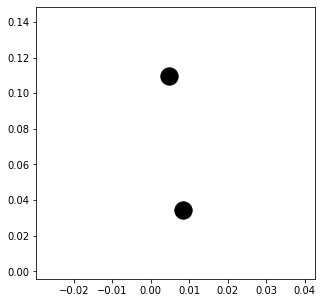

In [22]:
plt.figure(figsize=(5,5))
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=300)

In [23]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.30005850993674005

In [24]:
metrics.calinski_harabasz_score(X, labels)

2981.6377411231597

In [25]:
df_target = df[target_col_list]
print(df_target.shape)
df_target_arr = np.ravel(df_target)

(8000, 1)


In [26]:
df_target_arr
y_pred.shape

(8000,)

In [27]:
dataset = pd.DataFrame({ 'y_pred': y_pred}, 
                        columns=[ 'y_pred']
                        )

In [28]:
dataset.head()

,y_pred
0,1
1,1
2,0
3,1
4,1


In [29]:
target_pred_df = df_predictors.join(df_target).join(dataset)
target_pred_df.head(10)

,CIVIC_PARTICIPATION_2016_0.0,CIVIC_PARTICIPATION_2016_1.0,CIVIC_PARTICIPATION_2016_2.0,CIVIC_PARTICIPATION_2016_3.0,CIVIC_PARTICIPATION_2016_4.0,CIVIC_PARTICIPATION_2016_5.0,CIVIC_PARTICIPATION_2016_6.0,pew_churatd_2016_0.0,pew_churatd_2016_1.0,pew_churatd_2016_2.0,...,volunteerorg2_14_baseline_1,volunteerorg2_14_baseline_2,volunteerorg2_15_baseline_1,volunteerorg2_15_baseline_2,volunteerorg2_16_baseline_1,volunteerorg2_16_baseline_2,volunteerorg2_17_baseline_1,volunteerorg2_17_baseline_2,presvote16post_2016,y_pred
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1.0,1
1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,1,2.0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,1.0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,3.0,1
4,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,2.0,1
5,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,1.0,0
6,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,1,1.0,1
7,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,2.0,1
8,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,1.0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,1.0,0


In [30]:
count = 0
for row in target_pred_df.itertuples():
    if (row.presvote16post_2016 == 2): #and (row.y_pred == 0):
        count +=1
print(count)


3479


## Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [33]:
X = df_predictors
y = df_target
X.head()

,CIVIC_PARTICIPATION_2016_0.0,CIVIC_PARTICIPATION_2016_1.0,CIVIC_PARTICIPATION_2016_2.0,CIVIC_PARTICIPATION_2016_3.0,CIVIC_PARTICIPATION_2016_4.0,CIVIC_PARTICIPATION_2016_5.0,CIVIC_PARTICIPATION_2016_6.0,pew_churatd_2016_0.0,pew_churatd_2016_1.0,pew_churatd_2016_2.0,...,volunteerorg2_13_baseline_1,volunteerorg2_13_baseline_2,volunteerorg2_14_baseline_1,volunteerorg2_14_baseline_2,volunteerorg2_15_baseline_1,volunteerorg2_15_baseline_2,volunteerorg2_16_baseline_1,volunteerorg2_16_baseline_2,volunteerorg2_17_baseline_1,volunteerorg2_17_baseline_2
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0
4,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1


In [34]:
X.isna().sum().any()
y.isna().sum()

presvote16post_2016    394
dtype: int64

In [35]:
y = y.fillna(0)
y = np.ravel(y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2, 
                                                    stratify=y)

In [37]:
lr = LogisticRegression(C=2, penalty='l2', 
                        solver='lbfgs', 
                        multi_class='auto', 
                        max_iter=1000)
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)

In [38]:
df_target.columns

Index(['presvote16post_2016'], dtype='object')

In [39]:
cm = confusion_matrix(y_test, y_pred_test)
conf_matrix = pd.DataFrame(cm, index=['None','Clinton','Trump','Johnson','Stein','McMullin','Other','Did not vote'], 
                           columns=['Pred None','Pred Clinton','Pred Trump','Pred Johnson','Pred Stein','Pred McMullin','Pred Other','Pred Did Not Vote'])


conf_matrix

,Pred None,Pred Clinton,Pred Trump,Pred Johnson,Pred Stein,Pred McMullin,Pred Other,Pred Did Not Vote
None,0,36,43,0,0,0,0,0
Clinton,0,397,312,0,0,0,0,0
Trump,0,248,447,0,0,1,0,0
Johnson,0,21,25,0,0,0,0,0
Stein,0,18,4,0,0,0,0,0
McMullin,0,0,5,0,0,0,0,0
Other,0,13,23,0,0,0,0,0
Did not vote,0,3,4,0,0,0,0,0


In [40]:
# correct Clinton
correct = cm[1][1]
total = sum(cm[1])
pred_correct = correct/total
pred_correct

0.5599435825105783

In [41]:
# correct Trump
correct = cm[2][2]
total = sum(cm[2])
pred_correct = correct/total
pred_correct

0.6422413793103449

In [42]:
len(lr.coef_[1])

63

In [43]:
coef_dict = dict(zip(X.columns, lr.coef_[0]))
coef_dict

{'CIVIC_PARTICIPATION_2016_0.0': -1.0939796693661126,
 'CIVIC_PARTICIPATION_2016_1.0': 0.1884874528354243,
 'CIVIC_PARTICIPATION_2016_2.0': 0.07748289787277968,
 'CIVIC_PARTICIPATION_2016_3.0': -0.12372572986716132,
 'CIVIC_PARTICIPATION_2016_4.0': 0.018270247174592656,
 'CIVIC_PARTICIPATION_2016_5.0': 0.21271719972252864,
 'CIVIC_PARTICIPATION_2016_6.0': 0.712325944804517,
 'pew_churatd_2016_0.0': -0.23641730636937947,
 'pew_churatd_2016_1.0': 0.17711238148400826,
 'pew_churatd_2016_2.0': -0.3259391939696145,
 'pew_churatd_2016_3.0': -0.11118475429706645,
 'pew_churatd_2016_4.0': 0.03294058107133515,
 'pew_churatd_2016_5.0': -0.04370400998534695,
 'pew_churatd_2016_6.0': 0.04089867266552678,
 'pew_churatd_2016_7.0': 0.4578719725770572,
 'volunteer_baseline_0.0': 0.028717933478327386,
 'volunteer_baseline_1.0': -0.4074725212984391,
 'volunteer_baseline_2.0': 0.3703329309966392,
 'volunteerf_baseline_0.0': 0.12460388008971919,
 'volunteerf_baseline_1.0': 0.09407651679505613,
 'volunteer

## Feature importance

In [44]:
from sklearn.feature_selection import RFE
predictors = X_train
selector = RFE(lr, n_features_to_select=1)
selector = selector.fit(predictors, y_train)

In [45]:
len(X_train.columns)

63

In [46]:
order = selector.ranking_
len(order)
order

array([12, 58, 60, 43, 41, 56, 30, 45, 19, 20, 26,  9, 44,  2,  1, 62, 13,
       46, 55, 37, 50, 52, 53, 54, 33,  6,  5, 16, 14, 57, 38, 61, 63, 23,
       40, 15, 34, 49, 29,  7, 27, 39, 18, 48, 25, 42, 22, 31, 10, 47, 32,
        4, 17,  3, 21, 24,  8, 11, 35, 28, 51, 36, 59])

In [47]:
df_predictors.columns

Index(['CIVIC_PARTICIPATION_2016_0.0', 'CIVIC_PARTICIPATION_2016_1.0',
       'CIVIC_PARTICIPATION_2016_2.0', 'CIVIC_PARTICIPATION_2016_3.0',
       'CIVIC_PARTICIPATION_2016_4.0', 'CIVIC_PARTICIPATION_2016_5.0',
       'CIVIC_PARTICIPATION_2016_6.0', 'pew_churatd_2016_0.0',
       'pew_churatd_2016_1.0', 'pew_churatd_2016_2.0', 'pew_churatd_2016_3.0',
       'pew_churatd_2016_4.0', 'pew_churatd_2016_5.0', 'pew_churatd_2016_6.0',
       'pew_churatd_2016_7.0', 'volunteer_baseline_0.0',
       'volunteer_baseline_1.0', 'volunteer_baseline_2.0',
       'volunteerf_baseline_0.0', 'volunteerf_baseline_1.0',
       'volunteerf_baseline_2.0', 'volunteernum_baseline_0.0',
       'volunteernum_baseline_1.0', 'volunteernum_baseline_2.0',
       'volunteernum_baseline_3.0', 'volunteernum_baseline_4.0',
       'volunteernum_baseline_5.0', 'volunteernum_baseline_6.0',
       'volunteernum_baseline_7.0', 'volunteerorg2_1_baseline_1',
       'volunteerorg2_1_baseline_2', 'volunteerorg2_2_baseline_1'

In [48]:
for i in df_predictors.index:
    rank = np.array(order)
    feat = np.array(df_predictors.columns)
    rank_feat = pd.DataFrame(rank,feat, columns=['rank'])

In [52]:
rank_feat.sort_values(by='rank').head(10)

,rank
pew_churatd_2016_7.0,1
pew_churatd_2016_6.0,2
volunteerorg2_13_baseline_1,3
volunteerorg2_12_baseline_1,4
volunteernum_baseline_5.0,5
volunteernum_baseline_4.0,6
volunteerorg2_6_baseline_1,7
volunteerorg2_14_baseline_2,8
pew_churatd_2016_4.0,9
volunteerorg2_10_baseline_2,10


## Cross-validation

In [50]:
from sklearn.model_selection import cross_val_score

In [53]:
X.isna().sum().any()

False

In [54]:
y = np.ravel(y)
y.shape

(8000,)

In [55]:
scores = cross_val_score(lr, X, y, cv=5)

In [56]:
scores

array([0.57267623, 0.51685393, 0.53625   , 0.54409006, 0.52756892])

## Random forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [58]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
score = accuracy_score(y_test, y_pred_test)

/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
score

0.5125

In [60]:
scores = cross_val_score(rf, X, y, cv=5)

In [61]:
scores

array([0.54335621, 0.50811486, 0.5025    , 0.49718574, 0.4962406 ])

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv=5)
scores

array([0.4959451 , 0.48564295, 0.513125  , 0.48968105, 0.5       ])

In [64]:
from sklearn.svm import SVC

In [65]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_test = svm.predict(X_test)
score = accuracy_score(y_test, y_pred_test)
score

0.51875

In [ ]:
scores = cross_val_score(svm, X, y, cv=5)
scores

In [ ]:
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)
y_pred_test = svm.predict(X_test)
score = accuracy_score(y_test, y_pred_test)
score